In [2]:
from IPython.display import IFrame

In [9]:
import urllib
import json
from IPython.display import display, Markdown

def generate_toc(notebook_path, indent_char="&emsp;"):
    is_markdown = lambda it: "markdown" == it["cell_type"]
    is_title = lambda it: it.strip().startswith("#") and it.strip().lstrip("#").lstrip()
    
    # Load the notebook JSON
    with open(notebook_path, 'r') as in_f:
        nb_json = json.load(in_f)
    
    toc_lines = []
    for cell in filter(is_markdown, nb_json["cells"]):
        for line in filter(is_title, cell["source"]):
            line = line.strip()
            indent = indent_char * (line.index(" ") - 1)
            title = line.lstrip("#").lstrip()
            url = urllib.parse.quote(title.replace(" ", "-"))
            out_line = f"{indent}[{title}](#{url})<br>\n"
            toc_lines.append(out_line)
    
    # Join the lines into a single string
    toc_output = ''.join(toc_lines)
    
    # Display the TOC in the Jupyter notebook cell
    display(Markdown(toc_output))

# Call the function with the path to your notebook
generate_toc('computer_science.ipynb')

[computation](#computation)<br>
&emsp;[Turing machine](#Turing-machine)<br>
&emsp;[von Neumann model](#von-Neumann-model)<br>
&emsp;[information storage](#information-storage)<br>
&emsp;[computer languages](#computer-languages)<br>
&emsp;[operating systems](#operating-systems)<br>
&emsp;[history](#history)<br>
&emsp;&emsp;[mechanical machines (before 1930)](#mechanical-machines-%28before-1930%29)<br>
&emsp;&emsp;[the birth of electronic computers (1930â€“1950)](#the-birth-of-electronic-computers-%281930%C3%A2%E2%82%AC%E2%80%9C1950%29)<br>
&emsp;&emsp;[Computer generations (1950â€“present)](#Computer-generations-%281950%C3%A2%E2%82%AC%E2%80%9Cpresent%29)<br>
&emsp;&emsp;&emsp;[first generation](#first-generation)<br>
&emsp;&emsp;&emsp;[2nd](#2nd)<br>
&emsp;&emsp;&emsp;[3rd](#3rd)<br>
&emsp;&emsp;&emsp;[4th](#4th)<br>
&emsp;&emsp;&emsp;[5th](#5th)<br>
[representing numbers - number systems, endianness](#representing-numbers---number-systems%2C-endianness)<br>
[representing characters - ASCII, Unicode](#representing-characters---ASCII%2C-Unicode)<br>


# computation

In a broad sense, a `computer` is an abstraction/blackbox that recieves data (input), processes it (according to some internal `algorithms` - sequences of steps to solve a task) and sends back new data (output). In that sense it is a `data processor`. However:
* if it processes the data in a fixed way (aka the algorithms are fixed and cannot be changed), like in a hand calculator, it's a `specific/single-purpose computer`
* if the way the processing is done can be altered, it is a `programmable computer`, also called a `Turing machine/model`
    * if it can run any computation (anything that is `computable`), it is a `general-purpose/universal Turing machine`

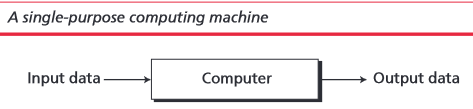

vs

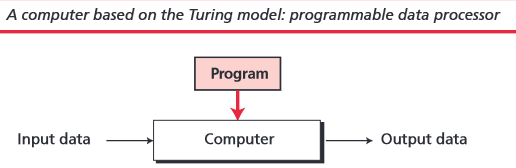

## Turing machine

In the Turing model/machine, the output data depends on the combination of two factors: the input data and the `program`. A program is a set of instructions that tells the computer what to do with data. With the same input data, we can generate different output if we change the program. A Turing machine is a mathematical model of computation describing an abstract machine that manipulates symbols on a strip of tape according to a table of rules.

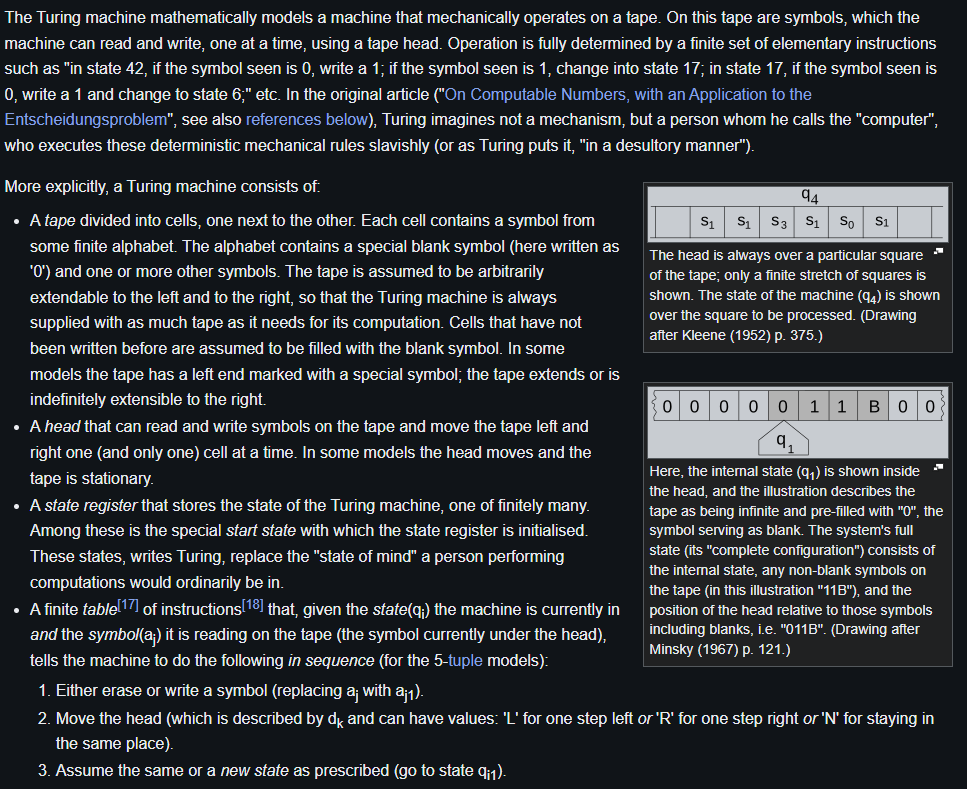

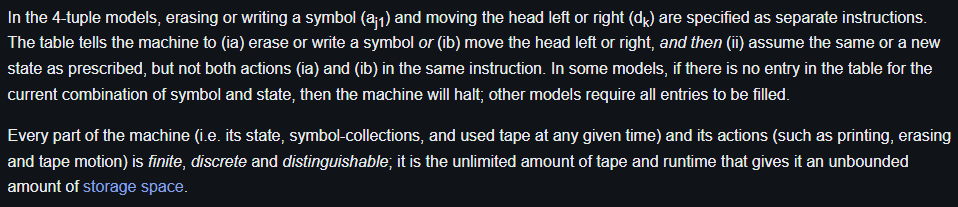

A Turing machine that is able to simulate any other Turing machine is called a universal Turing machine (UTM, or simply a universal machine). Another mathematical formalism, `lambda calculus`, with a similar "universal" nature was introduced by Alonzo Church
* in short, it's a machine that can do any computation if the appropriate program is provided
* it was the first description of a modern computer
* concept invented by `Alan Turing`

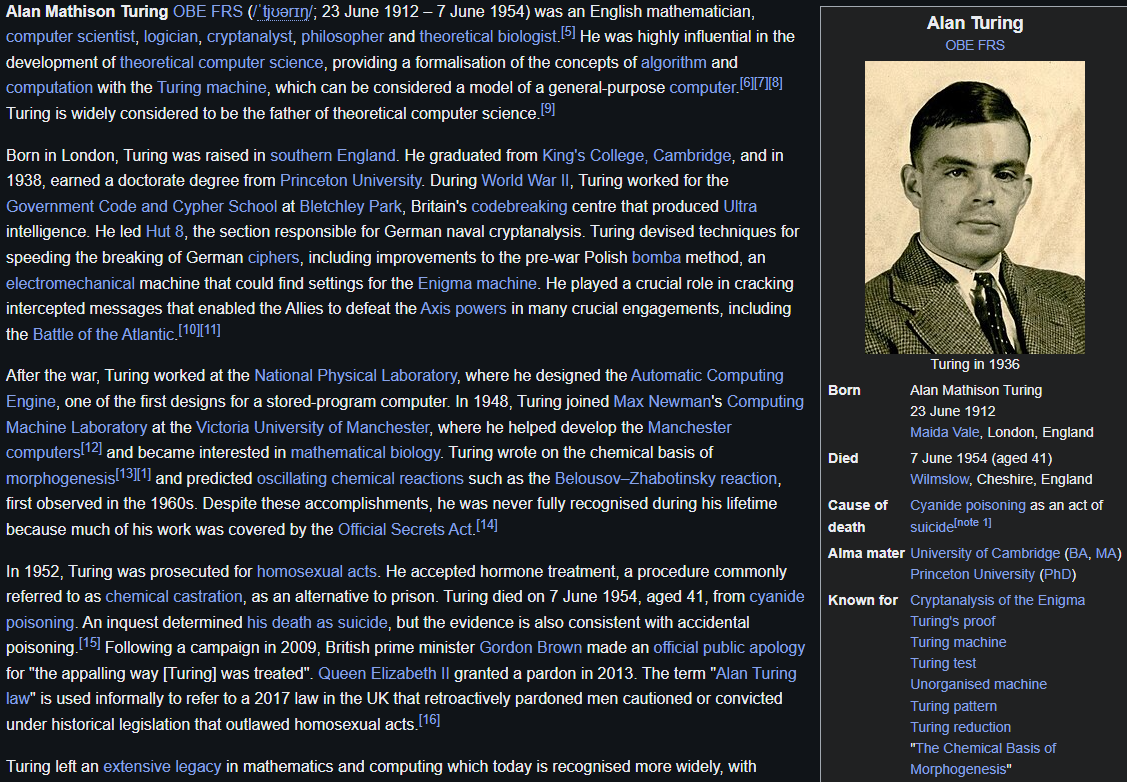

## von Neumann model

In terms of computer development history, another important step was the `von Neumann model`
* computers built on the Turing universal machine store data in their memory. Around 1945, `John von Neumann` proposed that, since program and data are logically the same, programs should also be stored in the memory of a computer. This is totally different from the architecture of early computers in which only the data was stored in memory: the programs for their task were implemented by manipulating a set of switches or by changing the wiring system. The memory of modern computers hosts both a program and its corresponding data. This implies that both the data and programs should have the same format, because they are stored in memory. In fact, they are stored as `binary` patterns in memory—a sequence of 0s and 1s, and they form the `software` (the set of instructions that can be stored and run by `hardware`, which is the physical parts of a computer)
* computers built on the von Neumann model divide the computer hardware into four subsystems: 
    * `memory` (and mass storage)

        This is the storage area. This is where programs and data are stored during processing.
    * `processing unit`

        The `arithmetic logic unit (ALU)` is where calculation and logical operations take place. For a computer to act as a data processor, it must be able to do arithmetic operations on data (such as adding a list of numbers). It should also be able to do logical operations on data
    * `control unit`

        The control unit controls the operations of the memory, processing unit, and the input/output subsystem. A program in the von Neumann model is made of a finite number of instructions. In this model, the control unit fetches one instruction from memory, decodes it, then executes it. In other words, the instructions are executed one after another. Of course, one instruction may request the control unit to jump to some previous or following instruction, but this does not mean that the instructions are not executed sequentially.
    * `input/output` 

        The input subsystem accepts input data and the program from outside the computer, while the output subsystem sends the result of processing to the outside world. The definition of the input/output subsystem is very broad: it also includes `secondary storage devices` such as disk or tape that stores data and programs for processing. When a disk stores data that results from processing, it is considered an output device: when it reads data from the disk, it is considered an input device.

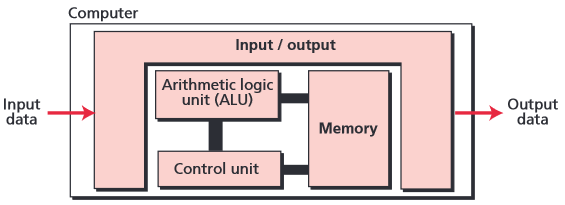

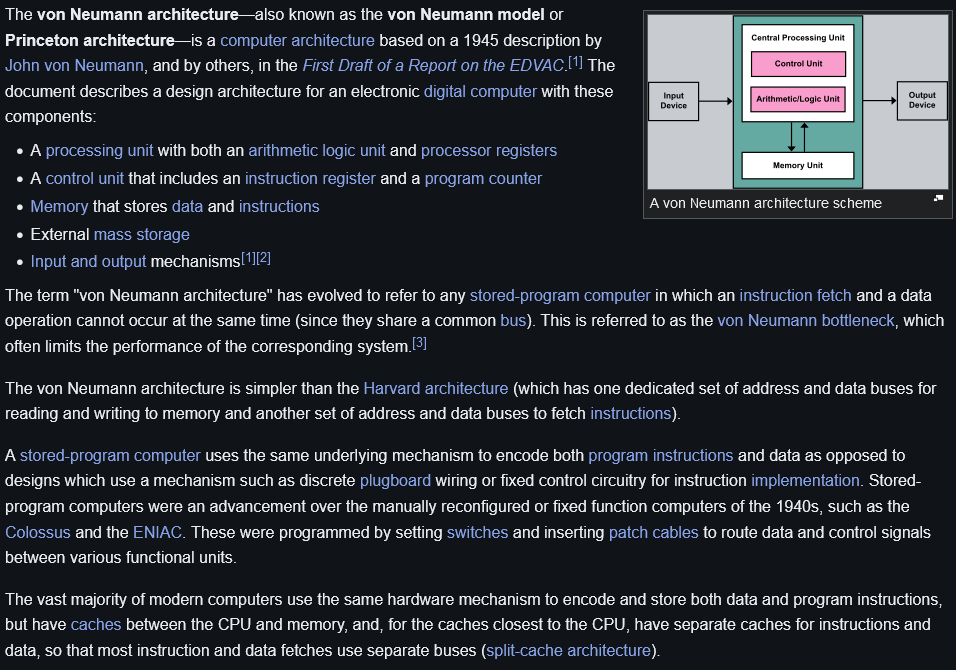

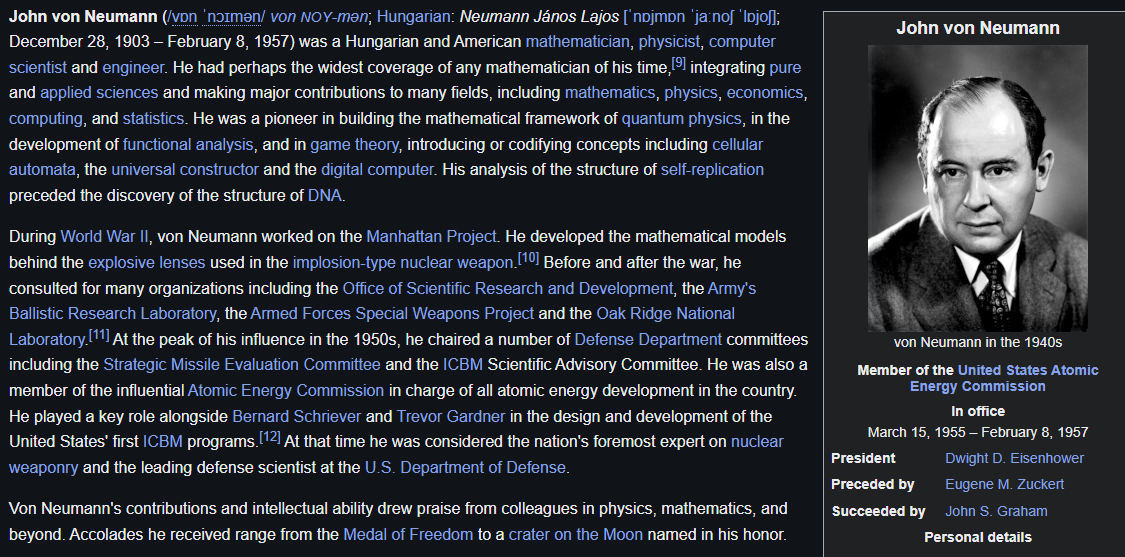

## information storage

The von Neumann model does not define how data must be stored in a computer. If a computer is an electronic device, the best way to store data is in the form of an electrical signal, specifically its presence or absence. This implies that a computer can store data in one of two states.

* Obviously, the data we use in daily life is not just in one of two states. For example, our (decimal) numbering system uses digits that can take one of ten states (0 to 9). We cannot store this type of information in a computer: it needs to be changed to another system that uses only two states (0 and 1). We also need to be able to process other types of data (text, image, audio, video). These also cannot be stored in a computer directly, but need to be changed to the appropriate form (0s and 1s).

## computer languages

* At the beginning of the computer age there was only one computer language, `machine language`.

    Programmers wrote instructions (using binary patterns) to solve a problem. 

* However, as programs became larger, writing long programs using these patterns became tedious. Computer scientists came up with the idea of using symbols to represent binary patterns, just as people use symbols (words) for commands in daily life. Of course, the symbols used in daily life are different from those used in computers. So the concept of `computer languages` was born. A natural language such as English is rich and has many rules to combine words correctly: a computer language, on the other hand, has a more limited number of symbols and also a limited number of words.

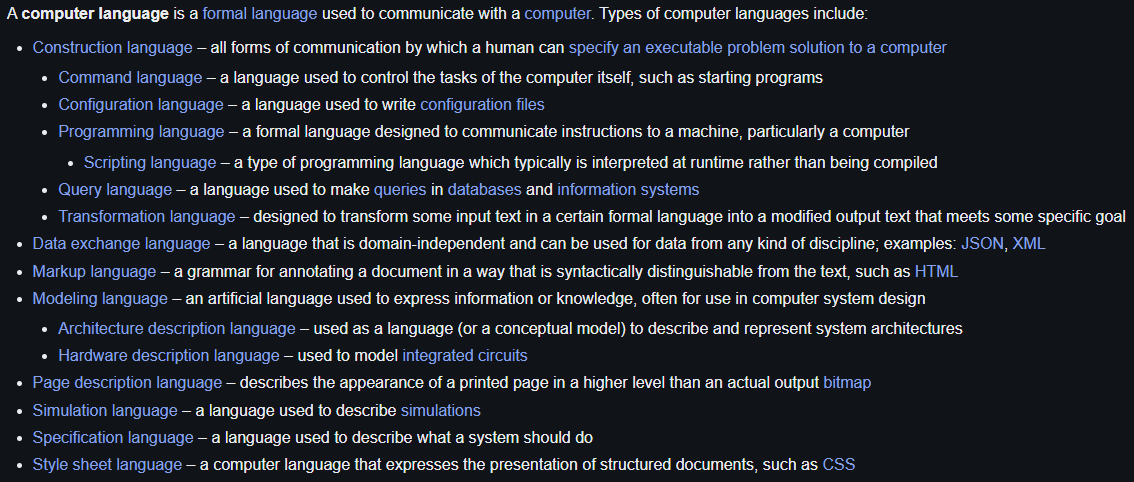

A `programming language` is a system of notation for writing computer programs. Most practical programming languages are `Turing complete/computationally universal`, and as such are equivalent in what programs they can compute.

## operating systems

During the evolution of computers, scientists became aware that there was a series of instructions common to all programs. For example, instructions to tell a computer where to receive data and where to send data are needed by almost all programs. It is more efficient to write these instructions only once for the use of all programs. Thus the concept of the operating system emerged. An `operating system` originally worked as a manager to facilitate access to the computer’s components by a program, although today operating systems do much more.

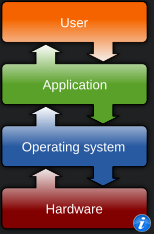

## history

* https://en.wikipedia.org/wiki/Computer

### mechanical machines (before 1930)

* In the seventeenth century, `Blaise Pascal`, a French mathematician and philosopher, invented `Pascaline`, a mechanical calculator for addition and subtraction operations. In the twentieth century, when Niklaus Wirth invented a structured programming language, he called it Pascal to honor the inventor of the first mechanical calculator.

In [3]:
prefix = 'https://www.youtube.com/embed/'
video_id = '3h71HAJWnVU'
youtube_url = prefix + video_id
IFrame(youtube_url, width=560, height=315)

* In the late seventeenth century, German mathematician `Gottfried Leibniz` invented a more sophisticated mechanical calculator that could do multiplication and division as well as addition and subtraction. It was called the `Leibniz Wheel`.

* The first machine that used the idea of storage and programming was the `Jacquard loom`, invented by `Joseph-Marie Jacquard` at the beginning of the nineteenth century. The loom used `punched cards` (like a stored program) to control the raising of the warp threads in the manufacture of textiles.

In [4]:
video_id = 'pzYucg3Tmho'
youtube_url = prefix + video_id
IFrame(youtube_url, width=560, height=315)

* In 1823, `Charles Babbage` invented the `Difference Engine`, which could do more than simple arithmetic operations—it could solve polynomial equations, too. Later, he invented a machine called the `Analytical Engine` that, to some extent, parallels the idea of modern computers. It had four components: a mill (corresponding to a modern ALU), a store (memory), an operator (control unit), and output (input/output).

* In 1890, `Herman Hollerith`, working at the US Census Bureau, designed and built a programmer machine that could automatically read, tally, and sort data stored on punched cards.

### the birth of electronic computers (1930–1950)

The early computers of this period did not store the program in memory—all were programmed externally. Five computers were prominent during these years:

* The first special-purpose computer that encoded information electrically was invented by John V. Atanasoff and his assistant Clifford Berry in 1939. It was called the `ABC (Atanasoff Berry Computer)` and was specifically designed to solve a system of linear equations.

* At the same time, a German mathematician called `Konrad Zuse` designed a general-purpose machine called `Z1`

* n the 1930s, the US Navy and IBM sponsored a project at Harvard University under the direction of `Howard Aiken` to build a huge computer called `Mark I`. This computer used both electrical and mechanical components.

* In England, Alan Turing invented a computer called `Colossus` that was designed to break the German `Enigma code`.

In [6]:
video_id = 'V4V2bpZlqx8'
youtube_url = prefix + video_id
IFrame(youtube_url, width=560, height=315)

* The first general-purpose, totally electronic computer was made by `John Mauchly and J. Presper Eckert` and was called `ENIAC (Electronic Numerical Integrator and Calculator)`. It was completed in 1946. It used 18 000 vacuum tubes, was 100 feet long by 10 feet high, and weighed 30 tons.

In [5]:
video_id = 'FU_YFpfDqqA'
youtube_url = prefix + video_id
IFrame(youtube_url, width=560, height=315)

The preceding five computers used memory only for storing data, and were programmed externally using wires or switches. John von Neumann proposed that the program and the data should be stored in memory. That way, every time we use a computer to do a new task, we need only change the program instead of rewiring the machine or turning hundreds of switches on and off.

* The first computer based on von Neumann's ideas was made in 1950 at the University of Pennsylvania and was called `EDVAC`. At the same time, a similar computer called `EDSAC` was built by Maurice Wilkes at Cambridge University in England.

### Computer generations (1950–present)

Historians divide this period into generations, with each generation witnessing some major change in hardware or software (but not in the model)

#### first generation

The first generation (roughly 1950–1959) is characterized by the emergence of commercial computers. During this time, computers were used only by professionals. They were locked in rooms with access limited only to the operator or computer specialist. Computers were bulky and used vacuum tubes as electronic switches. At this time, computers were affordable only by big organizations.

#### 2nd

* Second-generation computers (roughly 1959–1965) used `transistors` instead of `vacuum tubes`.

    This reduced the size of computers, as well as their cost, and made them affordable to small and medium-size corporations.

* Two high-level programming languages, `FORTRAN` and `COBOL`, were invented and made programming easier.

#### 3rd

* The invention of the `integrated circuit` (transistors, wiring, and other components on a single chip) reduced the cost and size of computers even further.

    Minicomputers appeared on the market. Canned programs, popularly known as software packages, became available. A small corporation could buy a package, for example for accounting, instead of writing its own program. A new industry, the software industry, was born. This generation lasted roughly from 1965 to 1975.

#### 4th

* The fourth generation (approximately 1975–1985) saw the appearance of `microcomputers`.

    The first desktop calculator, the `Altair 8800`, became available in 1975. Advances in the electronics industry allowed whole computer subsystems to fit on a single circuit board.

In [7]:
video_id = 'CZgD_bvPm0k'
youtube_url = prefix + video_id
IFrame(youtube_url, width=560, height=315)

* This generation also saw the emergence of computer networks

#### 5th

This open-ended generation started in 1985. It has witnessed the appearance of laptop and palmtop computers, improvements in secondary storage media (CD-ROM, DVD, and so on), the use of multimedia, and the phenomenon of virtual reality.

In [ ]:
# this sure needs some more updating

# representing numbers - number systems, endianness

https://exercism.org/tracks/python/concepts/binary-octal-hexadecimal

In [ ]:
# TODO

# representing characters - ASCII, Unicode

https://www.ascii-code.com/

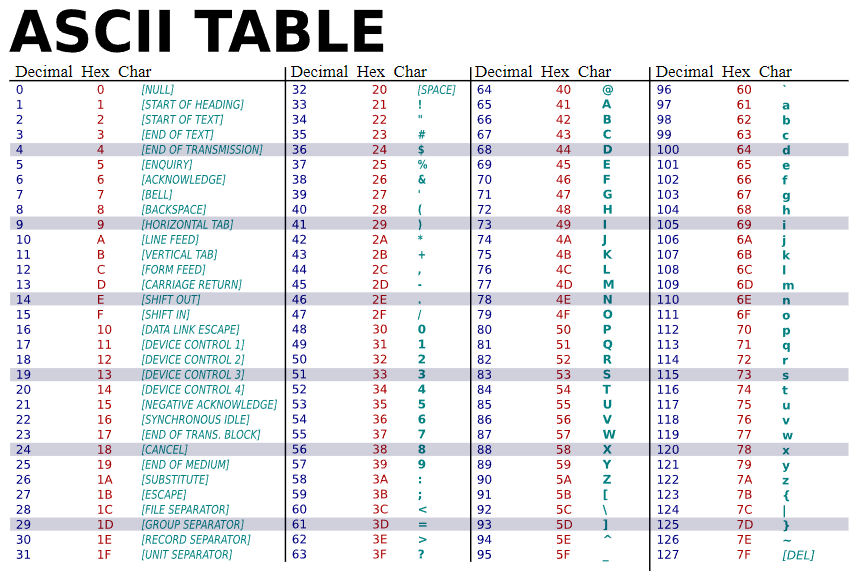

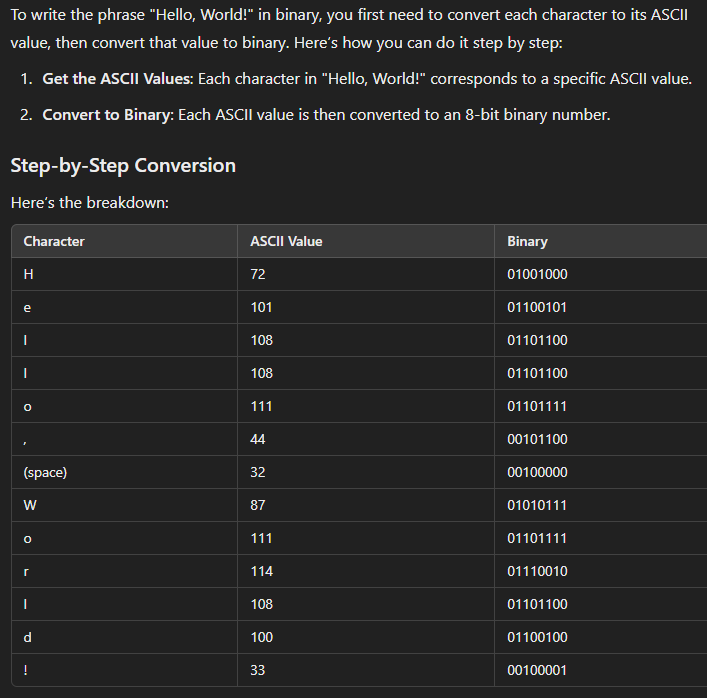

In [3]:
# convert character to Unicode value (by using the Unicode lookup table, a superset of the ASCII)
char = 'A'
ord(char) # shown in the decimal system

65

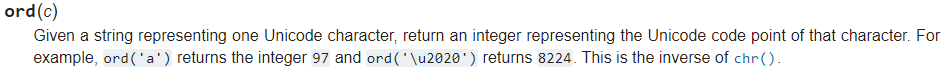

In [7]:
chr(65)

'A'

In [5]:
format(ord(char), '08b')

'00001010'

In [4]:
# line feed
char = '\n'
ord(char)

10

In [1]:
# Function to convert a string to its binary representation
def string_to_binary(string):
    # Convert each character to its ASCII value and then to binary
    binary_values = [format(ord(char), '08b') for char in string]
    # Join the binary values with spaces
    return ' '.join(binary_values)

In [2]:
# The string to convert
message = "Hello, World!"

# Convert and print the binary representation
binary_message = string_to_binary(message)
binary_message

'01001000 01100101 01101100 01101100 01101111 00101100 00100000 01010111 01101111 01110010 01101100 01100100 00100001'